# Pre-lecture HW 03 - Cayden Wong 2024/09/08

##### Important Notes
Use `fig.show(renderer="png")` for all plots

### Question 1: Use `fig.add[h/v]line()` and `fig.add[h/v]rect()` to mark, respspectively, location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations away from the mean in both directions) of flipper_length_mm for each species onto plotly histograms of flipper_length_mm for each species in the penguins dataset

Session link for Q1: https://chatgpt.com/share/66ef9c6a-4468-8012-b97f-ae0d51a82ad3

In [1]:
import pandas as pd
import plotly.express as px
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


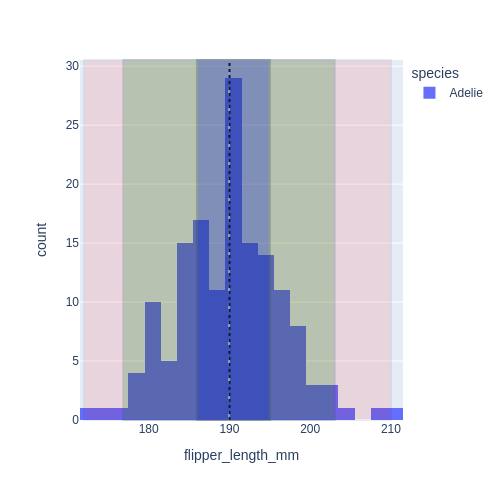

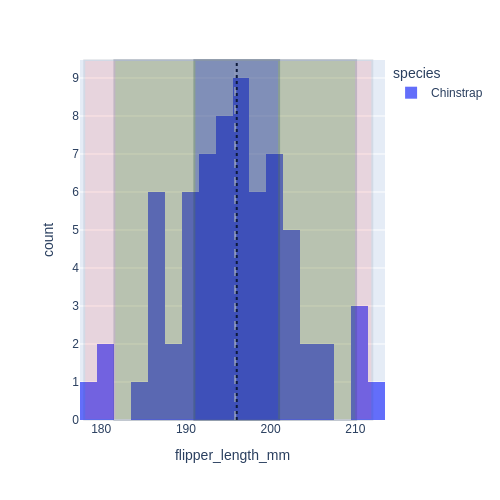

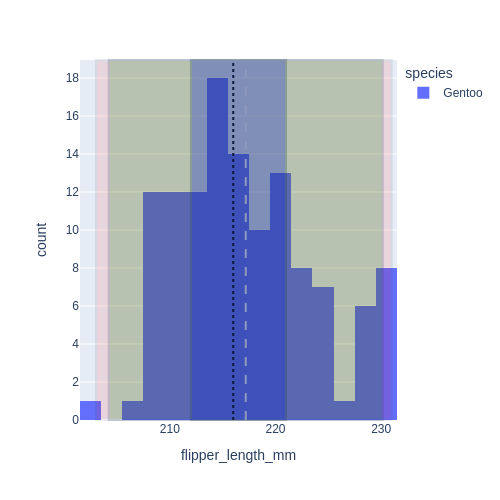

In [2]:
for species in penguins["species"].unique():
    penguin_histogram = px.histogram(penguins[penguins["species"] == species], x="flipper_length_mm", color="species", nbins=20, width=500)
    penguins_of_species_flipper_length = penguins[penguins["species"] == species]["flipper_length_mm"]
    mean = penguins_of_species_flipper_length.mean()
    median = penguins_of_species_flipper_length.median()
    upper = penguins_of_species_flipper_length.max()
    lower = penguins_of_species_flipper_length.min()
    q1 = penguins_of_species_flipper_length.quantile(0.25)
    q3 = penguins_of_species_flipper_length.quantile(0.75)
    two_std_below = mean - penguins_of_species_flipper_length.std() * 2
    two_std_above = mean + penguins_of_species_flipper_length.std() * 2

    penguin_histogram.add_vline(x=mean, line_dash="dash", line_color="white")
    penguin_histogram.add_vline(x=median, line_dash="dot", line_color="black")
    penguin_histogram.add_vrect(x0=lower, x1=upper, fillcolor="red", opacity=0.1)
    penguin_histogram.add_vrect(x0=q1, x1=q3, fillcolor="blue", opacity=0.3)
    penguin_histogram.add_vrect(x0=two_std_below, x1=two_std_above, fillcolor="green", opacity=0.2)

    penguin_histogram.show(renderer="png") #TODO: 
    

#### NotebookLM: Summary of interaction
##### Summary of Our Interaction: Exploring Standard Deviation and Line Customization in Data Visualization

Our conversation revolved around understanding standard deviation and customizing line styles in data visualizations. We explored how to calculate and visualize lines representing two standard deviations from the mean on a histogram, drawing heavily on the concepts and code examples presented in the sources. You specifically asked about:

*   **Terminology for the 1st and 3rd quartiles:**  You were curious about the terms used for the 1st and 3rd quartiles.  We established that they are often referred to as "first quartile" or Q1 (25th percentile), and "third quartile" or Q3 (75th percentile), respectively.
*   **Calculating line positions two standard deviations from the mean:** You sought clarification on calculating line positions to represent two standard deviations above and below the mean.  We reviewed the provided formulas and explained their relevance in highlighting data spread, especially in a normal distribution.
*   **DataFrame method for standard deviation:** You asked if there's a pandas DataFrame method to return the standard deviation. We confirmed that `.std()` is used, and reviewed its application to a column.
*   **Options for line types in data visualization libraries:** You wanted to understand the different line styles (like dashed, dotted) available in libraries like *plotly*. While the sources didn't explicitly list these options, we discussed common line types and recommended consulting library documentation for specific options.
*   **Changing the line type of a `vrect` object:**  You were curious about modifying the line type of a `vrect`. I explained that the sources lack direct information on `vrect` customization. To assist further, I asked you to provide more context about the library and the visual effect you aimed to achieve. 

**Overall, our interaction focused on practical aspects of data visualization, specifically using lines to represent statistical concepts like standard deviation. We relied on the code examples and the emphasis on customization found in the sources to address your questions.** 

#### ChatGPT: Summary of interaction
Here's a summary of our entire interaction:

1. **Mean, Median, and Skewness**:
   - We discussed the relationship between the mean, median, and skewness. For **right (positive) skewness**, the mean is greater than the median, and for **left (negative) skewness**, the mean is less than the median due to the influence of outliers on the mean.
   - You shared some Python code using the `scipy.stats.gamma` distribution to generate skewed data samples and calculate descriptive statistics like mean and median. I explained how the code works and what it does.

2. **Plotly Renderers in VS Code**:
   - You mentioned that using `renderer="png"` in Plotly's `px.histogram` in VS Code's `.ipynb` files was taking a long time to render (over 3 minutes).
   - I explained that PNG rendering can be slower compared to interactive modes and suggested alternatives like using the default interactive renderer or saving the plot directly as an image using `fig.write_image()`.

3. **Customizing Plotly Histogram Colors**:
   - You asked about aligning the colors of `vline` and `vrect` with the colors used for the `species` in a Plotly histogram.
   - I showed how to manually define a color map for each species and apply the corresponding colors to the vertical lines and rectangles, so they match the species color in the histogram.

4. **Clarification on `max()` and `min()`**:
   - You inquired about what `max()` and `min()` return. I explained that these functions return the maximum and minimum values of the given dataset, which in your case represent the extremes of flipper lengths for each species.

Let me know if you need further clarification or help!

### Question 2: Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots

Session link for Q2: https://chatgpt.com/share/66ef9c6a-4468-8012-b97f-ae0d51a82ad3

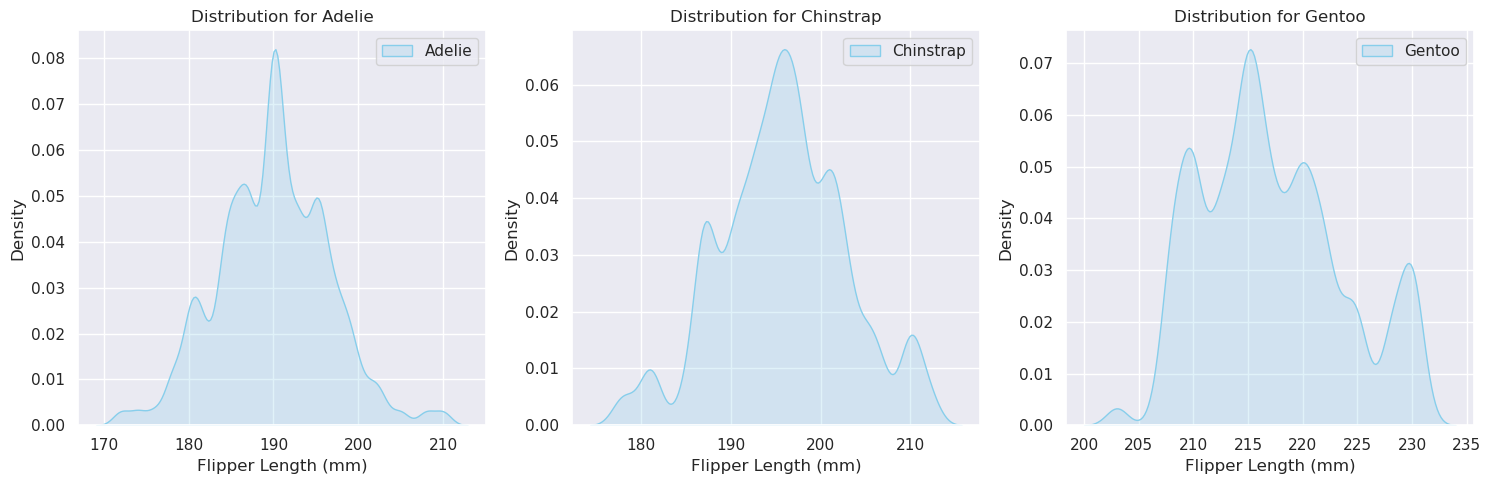

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Styling the plots
sns.set_style("darkgrid")
sns.set_context("notebook")
sns.set_palette("coolwarm")

# Lines three plots side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, species in enumerate(penguins['species'].unique()):
    subset = penguins[penguins['species'] == species]
    
    # Create the KDE plot on the corresponding axis
    sns.kdeplot(x='flipper_length_mm', data=subset, ax=axes[i], label=species, color="skyblue", fill=True, bw_adjust=0.4)
    axes[i].set_title(f'Distribution for {species}')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].legend()

plt.tight_layout() # Adjust spacing between plots
plt.show() #TODO: 
    

#### ChatGPT: Interaction summary
Here's a summary of our interaction following the previous summary:

1. **Seaborn `axvline()` Color Customization**:
   - You asked how to change the color of a `seaborn` `axvline()` in a plot. I explained that you can pass the `color` argument when using `plt.axvline()`, allowing you to set the line color using named colors, hexadecimal codes, or RGB triplets.

2. **Multiple Seaborn Plots in a Single Cell**:
   - You asked if it’s possible to output multiple Seaborn graphs from a single `.ipynb` cell. I demonstrated how to create multiple plots using `plt.figure()` for each plot in the same cell and display them sequentially using `plt.show()`.

3. **Seaborn Styles**:
   - You inquired about setting a "nice" style for `kdeplot`. I explained how to use `sns.set_style()` to apply built-in Seaborn styles like `"whitegrid"`, `"darkgrid"`, and `"ticks"`, and demonstrated examples.
   - I also mentioned how you can combine `sns.set_style()`, `sns.set_context()`, and `sns.set_palette()` to further customize the appearance of the plots.

4. **Popular Style Combinations in Seaborn**:
   - You asked about popular combinations of `set_style`, `set_context`, and `set_palette`. I provided common combinations such as `"whitegrid"` with `"talk"` context and `"muted"` palette for professional looks, and `"darkgrid"` with `"coolwarm"` palette for contrast-rich visuals. These combinations are often used in presentations, reports, or data analysis.

5. **Changing the Bandwidth of a `kdeplot`**:
   - You asked how to change the bandwidth of a `kdeplot`. I explained two methods:
     - **`bw_adjust`**: Multiplies the default bandwidth by a scaling factor (e.g., `bw_adjust=0.5` for finer details, `bw_adjust=1.5` for smoother curves).
     - **`bw_method`**: Allows the use of specific bandwidth selection methods like `'scott'` or `'silverman'`.

Let me know if you need further clarification on any of these topics!

#### NotebookLM: Interaction Summary
##### Summary of Our Conversation: Seaborn, KDEs, and Data Visualization

Our conversation began with you asking how to change line colors in data visualization libraries. I explained that while the sources don't provide an exhaustive list, they emphasize the customization flexibility of tools like *plotly* and *seaborn*, implying that line color would be a customizable feature. We looked at examples from our previous interactions and I noted that color manipulation is often handled through arguments like `line_color` in *plotly* and `color` in *seaborn* (which leverages *matplotlib*'s capabilities). I also mentioned common approaches to specifying colors: named colors, hex codes, and RGB values. 

You then shifted the focus to using *seaborn* to create KDE plots arranged in a row of three.  I confirmed that *seaborn* would be suitable based on Source's statement contrasting *plotly* with *seaborn* for KDEs: "Histograms versus kernel density estimates (KDEs) - plotly (not this) VS Waskom's seaborn". I provided an illustrative code example using `sns.kdeplot()` to generate the KDE plots and *matplotlib.pyplot*'s `subplots()` to arrange them.  

Our conversation then explored the concept of "nbin" in the context of KDEs. You were curious about increasing the "nbin" of a KDE plot.  I clarified that "nbin" is not directly applicable to KDEs because they don't use bins like histograms. KDEs use kernel functions and a parameter called "bandwidth" to control smoothness. We established the analogy between "nbin" in histograms and "bandwidth" in KDEs: a higher "nbin" in histograms generally corresponds to more detail (Source: "More **histogram bins** means a finer less course less simplified visually summer of the data."), while a *narrower* bandwidth in KDEs achieves a similar effect. Source supports this, stating that the "bandwidth" parameter determines the "width" of the kernel used in the KDE.

Finally, we discussed the trade-off in selecting an appropriate bandwidth: a very narrow bandwidth can lead to overfitting, similar to using too many bins in a histogram, while a very wide bandwidth can oversmooth the KDE, obscuring important features. I suggested visual inspection and the use of automatic bandwidth selection methods provided by some libraries as ways to find a good balance.  


### Question 3: Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference

Session Link for Q3: https://chatgpt.com/share/66f0f12c-6fa4-8012-a54b-0c7d33f07ce0

**My thoughts**  
Box Plot:
- Indicates where the IQR lies within the data
- Determines where outliers lie relative to the rest of the data
- Best at indicating the general range of the data and identifying where most of the data lies
- Not good at determining the type of spread across the data (unimodal, bimodal, multimodal)

Overall, box plots are good for viewing the range and span of a set of data. It is also useful for identifying outliers that may taint or skew the data and need to be cleaned or excluded during future analysis. However, a box plot conveys very little information on the shape of the data and what areas are the most dense.

Histogram:
- Indicates the number of observations within a certain range of values
- Good at comparing the number of observations within a continuous dataset
- Easy to identify where values many different values seem to group together (can identify modality)
- Does not give meaningful results when working with smaller amounts of data or non-discrete data

Overall, histograms are very useful for relaying the general shape of the data and allows the view to easily identify factors such as modality. When view continuous data, histograms excel at easily comparing adjacent values with one another. Where histograms fail however, is when there is a lack of data, leading to larger bin sizes which obfuscates the overall shape and distribution of the data. In addition, it is hard to identify where the median and mean of the data lie, only providing information for a simple somewhat inaccurate guess.

Kernel Density Estimate:
- Indicates the overall shape and trend of data values within the data set
- Best with large amounts of data to get an accurate outline of where most data lies
- Useful in eliminating outliers that do not fit the trend (however this could sometimes hide meaningful data)
- Only gives information about values relative to the rest of the population (does not include counts)

Kernel Density Estimates are similar to histograms where they are able to convey information about the shape of the data, which is useful for modality. Where Kernel Density Estimates differ from histograms is the meaning of the height within the graph, conveying statistical information about the percentage of the population which lies at a specific value of data (ie the area under the graph is 1). In addition, Kernel Density Estimates do not have bins and instead have bandwidth, which allows them to smoothly display the shape of the data. The downside of this however, is that the Kernel Density Estimate may show that data exists in location where there was no actual data collected, leading to an inaccurate representation of the data.

**ChatGPT's Pros and Cons**
Box Plot
Pros:
- Compact Summary: Box plots provide a concise summary of the data, especially useful for identifying the spread, quartiles, and outliers at a glance.
- Robust to Outliers: They clearly show where the outliers are in relation to the rest of the data, making them excellent for summarizing distributions with outliers.
- Comparison Across Groups: Very effective in comparing the spread and skewness across different categories or groups.

Cons:
- No Indication of Distribution Shape: As you mentioned, box plots do not reveal if the data is unimodal, bimodal, or multimodal. The distribution's shape remains hidden.
- Less Effective with Small Data: With smaller datasets, outliers might dominate the visual and skew the perception of the data distribution.
- Lack of Granularity: It may obscure finer details such as the density of data points within the quartiles.

Histogram
Pros:
- Clear View of Distribution: Histograms are excellent for showing the frequency distribution of data and identifying modality (peaks and troughs).
- Works Well with Continuous Data: When the dataset is large enough, histograms provide a detailed view of the spread and distribution of continuous variables.
- Flexible Binning: You can adjust bin width to either provide a high-level overview or zoom in for more detail, making them versatile.

Cons:
- Binning Artifacts: The choice of bin size can greatly affect the interpretation of the data. Too few bins oversimplify the data; too many bins might make patterns harder to discern.
- Less Effective with Sparse Data: Histograms can be misleading with small datasets as the bins may not contain enough data to form a meaningful shape.
- Doesn’t Show Exact Values: Unlike dot plots or other specific representations, histograms only summarize data into bins, losing specific data points.

Kernel Density Estimate (KDE)
Pros:
- Smooth Representation: KDEs offer a smooth, continuous estimate of the data distribution, which makes it easier to identify trends and general shapes.
- No Binning: Unlike histograms, KDEs don’t rely on bins, which helps avoid issues with bin width selection and gives a smoother view of the data.
- Modality Identification: KDEs are effective in identifying multiple peaks in the data, which can point to the presence of multiple modes (bimodal, multimodal data).

Cons:
- Sensitive to Bandwidth: The smoothing parameter (bandwidth) can significantly affect the result. Too large a bandwidth oversmooths the data, hiding important features; too small, and it resembles a histogram with many narrow peaks.
- Can Hide Outliers: While KDEs smooth the distribution, they may mask outliers or unusual patterns that could be meaningful.
- Relative, Not Absolute Frequency: As you noted, KDEs don't give direct counts or frequencies, which can make them less intuitive for readers who want to know "how many" rather than "how common."

**My conclusion**
Overall, after evaluating both my own and ChatGPT's opinions on each type of data, I conclude that the histogram may better suit my needs as a means of visualizing data. This is largely in part to the ability to identify modality and distribution shape, while simultaneously maintaining information on how many observations fall within specific range values. This especially works well with discrete data, as its continuous nature allows for identifying trends in frequency shifts as a variable's value changes.

### 4. Run the code below and look at the resulting figure of distrubutions and then answer the following questions
- Which datasets have similar means and similar variances
- Which datasets have similar means but quite different variances
- Which datasets have similar variances but quite different means
- Which datasets have quite different means and quite different variances

1) Plots A and C have similar means and similar variance, both being fairly spread out
2) Plot B has a very similar mean to plots A and C but has a much smaller variance due to the data being closely concentrated around a central point
3) Plots B and D have quite low variances but different means. Both plots feature concentrated data, but plot D's data is focused around a higher central value
4) Plots A and C have both different means and different variances to plot D as they both have spread out data and are shifted lower than plot D's values

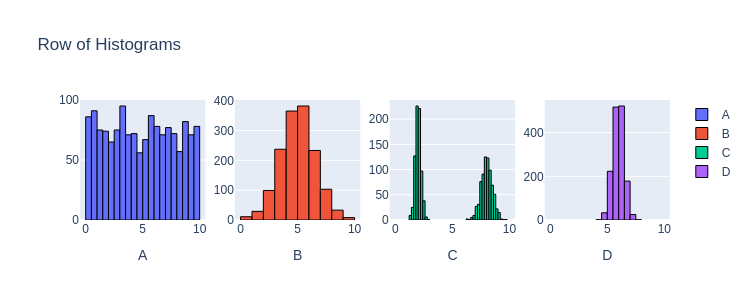

In [4]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(
    n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(
    line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(
    line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(
    line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(
    line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)

# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png")  # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 5. Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

Session link for Q5: https://chatgpt.com/share/66f43b13-0ddc-8012-9157-6871db60d2b4

**My thoughts**  
"Right" skewness occurs when the mean is greater than the median, this is characterized by a long tail extending to the right, with a large amount of data to the left of the mean. The tail increases the average, pulling it further to the right than the median.

"Left" skewness occurs when the mean is less than the median, this is characterized by a long tail extending to the left, with a large amount of data to the right of the mean. The tail decreases the average, pulling it further to the left than the median.

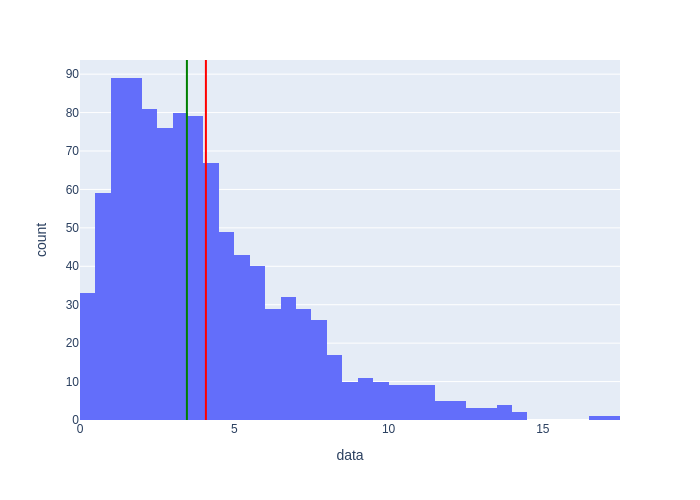

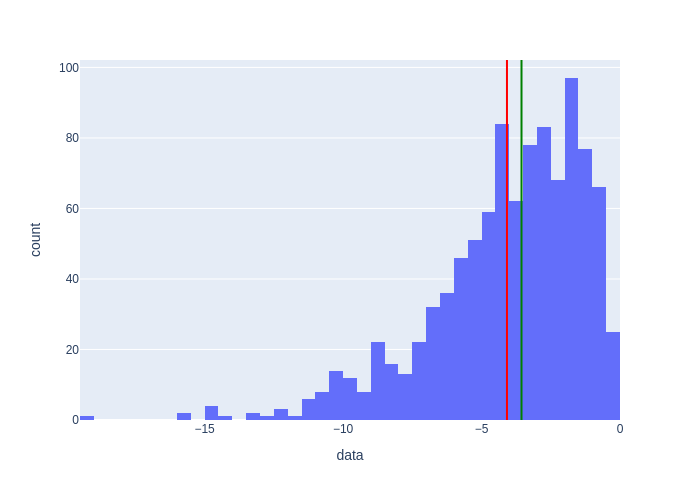

In [5]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1_mean = sample1.mean()
sample1_median = np.quantile(sample1, [0.5]) # median
fig1.add_vline(sample1.mean(), line_color="red")
fig1.add_vline(sample1_median[0], line_color="green")

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
sample2_mean = sample2.mean()
sample2_median = np.quantile(sample2, [0.5]) # median
fig2.add_vline(sample2.mean(), line_color="red")
fig2.add_vline(sample2_median[0], line_color="green")

fig1.show(renderer="png") # TODO
fig2.show(renderer="png")

##### 6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

Session links for Q6: 
- https://chatgpt.com/share/66f4daab-00d0-8012-999a-0adf198e2443
- https://chatgpt.com/share/66f4dabe-7ef8-8012-af32-a11b692af110

In [6]:
import pandas as pd
import plotly.express as px


questions = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-09-03/stackoverflow_survey_questions.csv')
questions

,qname,question
0,main_branch,Which of the following options best describes ...
1,age,What is your age?*
2,remote_work,Which best describes your current work situation?
3,ed_level,Which of the following best describes the high...
4,years_code,"Including any education, how many years have y..."
5,years_code_pro,"NOT including education, how many years have y..."
6,dev_type,Which of the following describes your current ...
7,org_size,Approximately how many people are employed by ...
8,purchase_influence,"What level of influence do you, personally, ha..."
9,buildvs_buy,When asked to provide a recommendation for sol...


In [7]:
crosswalk = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-09-03/qname_levels_single_response_crosswalk.csv')
crosswalk

,qname,level,label
0,main_branch,1,I am a developer by profession
1,main_branch,2,I am learning to code
2,main_branch,3,"I am not primarily a developer, but I write co..."
3,main_branch,4,I code primarily as a hobby
4,main_branch,5,"I used to be a developer by profession, but no..."
...,...,...,...
117,survey_length,2,Too long
118,survey_length,3,Too short
119,survey_ease,1,Difficult
120,survey_ease,2,Easy


In [8]:
# Load the CSV into a DataFrame
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-09-03/stackoverflow_survey_single_response.csv"
df = pd.read_csv(url)

# Preview the data
df.head()
df.describe()


,response_id,main_branch,age,remote_work,ed_level,years_code,years_code_pro,dev_type,org_size,purchase_influence,...,ai_select,ai_sent,ai_acc,ai_complex,ai_threat,survey_length,survey_ease,converted_comp_yearly,r_used,r_want_to_use
count,65437.000000,65437.000000,65437.000000,54806.000000,60784.000000,59869.000000,51610.000000,59445.000000,47480.000000,47406.000000,...,60907.000000,45873.000000,37302.000000,37021.000000,44689.000000,56182.000000,56238.000000,2.343500e+04,59745.000000,55752.000000
mean,32719.000000,1.503370,2.629201,1.960150,3.513309,14.197498,10.184344,17.168004,4.773905,2.188373,...,2.374752,2.385761,3.846952,2.232247,1.921905,1.326154,2.408887,8.615529e+04,0.043435,0.039048
std,18890.179119,1.015683,1.583867,0.893559,1.932414,10.655427,9.109703,7.746213,2.475729,0.765541,...,0.849427,1.681352,1.209167,1.113339,0.559586,0.502137,0.545992,1.867570e+05,0.203835,0.193711
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000
25%,16360.000000,1.000000,2.000000,1.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2.000000,...,2.000000,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,3.271200e+04,0.000000,0.000000
50%,32719.000000,1.000000,2.000000,2.000000,3.000000,11.000000,7.000000,16.000000,5.000000,2.000000,...,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000,2.000000,6.500000e+04,0.000000,0.000000
75%,49078.000000,1.000000,3.000000,3.000000,5.000000,20.000000,15.000000,19.000000,6.000000,3.000000,...,3.000000,4.000000,5.000000,3.000000,2.000000,2.000000,3.000000,1.079715e+05,0.000000,0.000000
max,65437.000000,5.000000,8.000000,3.000000,8.000000,51.000000,51.000000,34.000000,10.000000,3.000000,...,3.000000,6.000000,5.000000,5.000000,3.000000,3.000000,3.000000,1.625660e+07,1.000000,1.000000


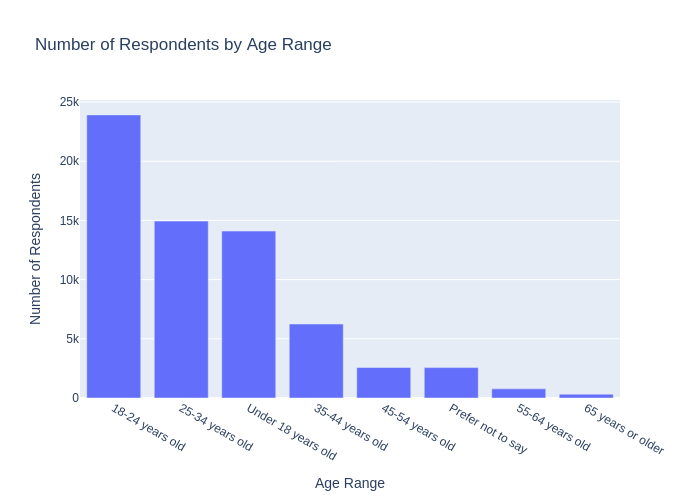

In [9]:
# Create a dictionary for remapping
age_map = {
    1: 'Under 18 years old',
    2: '18-24 years old',
    3: '25-34 years old',
    4: '35-44 years old',
    5: '45-54 years old',
    6: '55-64 years old',
    7: '65 years or older',
    8: 'Prefer not to say'
}

# Sample DataFrame
df['Age Range'] = df['age'].map(age_map)

# Count the number of respondents per age range
age_counts = df['Age Range'].value_counts().reset_index()
age_counts.columns = ['Age Range', 'Respondents']

# Plot a bar graph using Plotly
fig = px.bar(age_counts, x='Age Range', y='Respondents',
             title='Number of Respondents by Age Range',
             labels={'Respondents': 'Number of Respondents', 'Age Range': 'Age Range'})

fig.update_layout(xaxis_title='Age Range', yaxis_title='Number of Respondents')
fig.show(renderer="png")

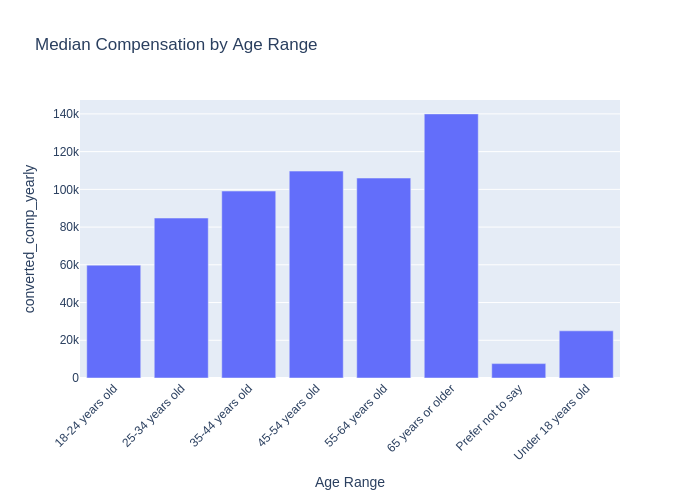

In [10]:
# Sample DataFrame
df['Age Range'] = df['age'].map(age_map)

# Filter out missing salary data
df = df.dropna(subset=['converted_comp_yearly'])

# Calculate median salary by age group
median_salary_by_age = df.groupby('Age Range')['converted_comp_yearly'].median().reset_index()

# Plotting with Plotly
fig = px.bar(median_salary_by_age, x='Age Range', y='converted_comp_yearly',
             title='Median Compensation by Age Range',
             labels={'Compensation': 'Median Compensation', 'Age Range': 'Age Range'})
             
fig.update_layout(xaxis_tickangle=-45)
fig.show(renderer="png") # TODO


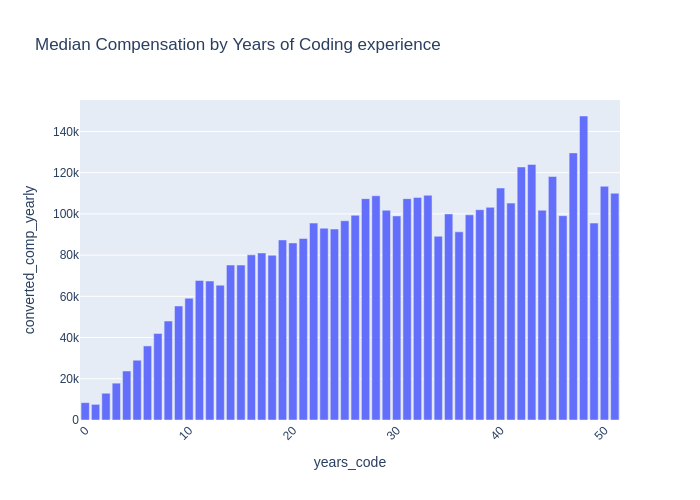

In [11]:
median_salary_by_years_code = df.groupby('years_code')['converted_comp_yearly'].median().reset_index()

fig = px.bar(median_salary_by_years_code, x='years_code', y='converted_comp_yearly',
             title='Median Compensation by Years of Coding experience',
             labels={'Compensation': 'Median Compensation', 'Years of Coding Experience': 'years_code'})
             
fig.update_layout(xaxis_tickangle=-45)
fig.show(renderer="png") # TODO

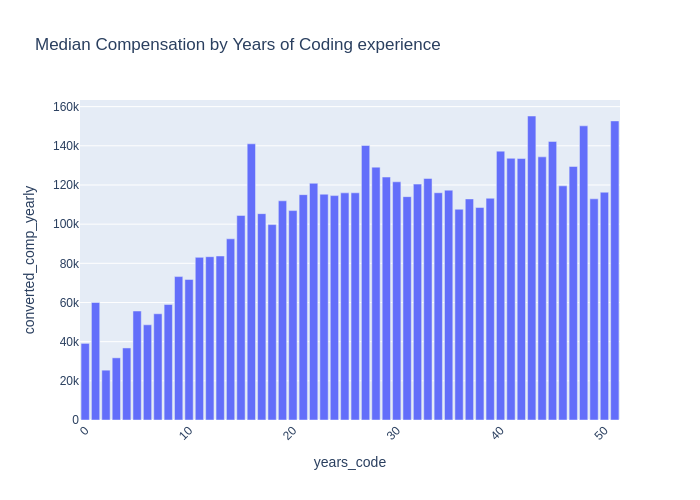

In [12]:
average_salary_by_years_code = df.groupby('years_code')['converted_comp_yearly'].mean().reset_index()

fig = px.bar(average_salary_by_years_code, x='years_code', y='converted_comp_yearly',
             title='Median Compensation by Years of Coding experience',
             labels={'Compensation': 'Median Compensation', 'Years of Coding Experience': 'years_code'})
             
fig.update_layout(xaxis_tickangle=-45)
fig.show(renderer="png") # TODO

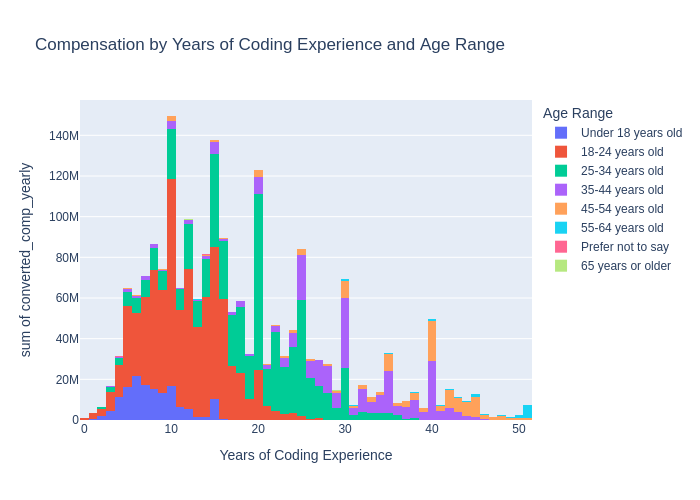

In [13]:
fig = px.histogram(df, x='years_code', y='converted_comp_yearly', color='Age Range',
                   title="Compensation by Years of Coding Experience and Age Range",
                   labels={'years_code': 'Years of Coding Experience', 'compensation': 'Compensation'},
                   barmode='stack')

fig.show(renderer="png") # TODO

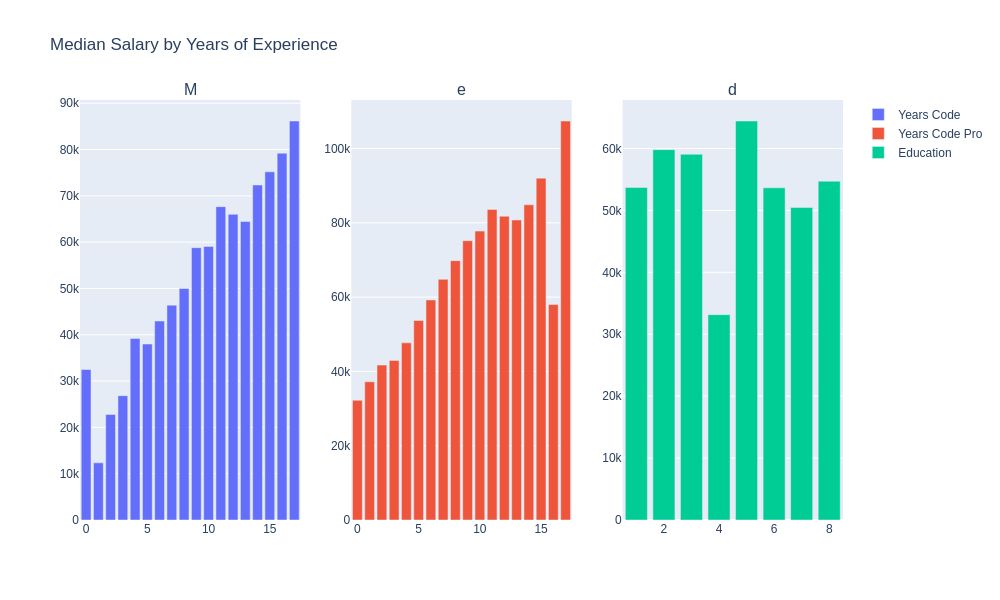

In [14]:
only_new_grads = df[df["age"] == 2]

only_new_grads.describe()
# only_new_grads.value_counts("Age Range")
only_new_grads.value_counts("years_code")
only_new_grads = only_new_grads[(only_new_grads["years_code"] < 18) & (only_new_grads["years_code_pro"] < 18)]

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=("Median Salary by Years of Experience"))

# First bar plot - years_code
new_grad_median_comp = only_new_grads.groupby("years_code")["converted_comp_yearly"].median().reset_index()
bar1 = go.Bar(x=new_grad_median_comp['years_code'], y=new_grad_median_comp['converted_comp_yearly'], name="Years Code")
fig.add_trace(bar1, row=1, col=1)

# Second bar plot - years_code_pro
new_grad_median_comp_pro = only_new_grads.groupby("years_code_pro")["converted_comp_yearly"].median().reset_index()
bar2 = go.Bar(x=new_grad_median_comp_pro['years_code_pro'], y=new_grad_median_comp_pro['converted_comp_yearly'], name="Years Code Pro")
fig.add_trace(bar2, row=1, col=2)

new_grad_median_comp_pro = only_new_grads.groupby("ed_level")["converted_comp_yearly"].median().reset_index()
bar3 = go.Bar(x=new_grad_median_comp_pro['ed_level'], y=new_grad_median_comp_pro['converted_comp_yearly'], name="Education")
fig.add_trace(bar3, row=1, col=3)

# Update layout
fig.update_layout(height=600, width=1000, title_text="Median Salary by Years of Experience")

fig.show(renderer="png")

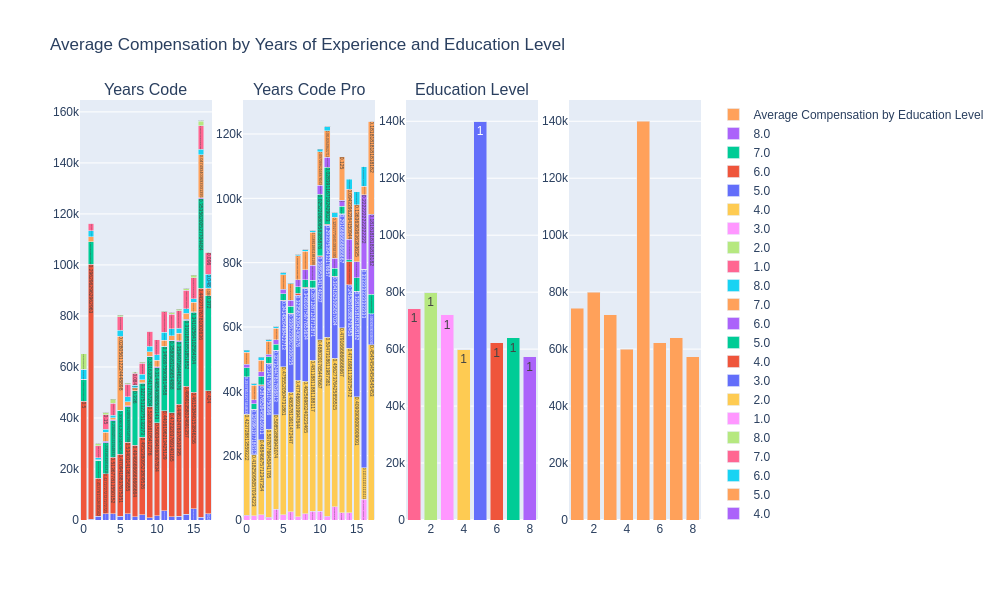

In [15]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming `only_new_grads` is your filtered DataFrame
only_new_grads = df[df["age"] == 2]

# Filter based on years of code
only_new_grads = only_new_grads[(only_new_grads["years_code"] < 18) & (only_new_grads["years_code_pro"] < 18)]

# Create subplots
fig = make_subplots(rows=1, cols=4, subplot_titles=("Years Code", "Years Code Pro", "Education Level"))

def add_stacked_bar_with_avg_comp(fig, df, x_col, row, col):
    # Calculate the average compensation for each experience category
    avg_comp = df.groupby(x_col)["converted_comp_yearly"].mean().reset_index()
    
    # Calculate the counts of each education level
    edu_counts = df.groupby([x_col, "ed_level"]).size().unstack(fill_value=0)

    # Calculate the total count per category for percentage calculation
    total_counts = edu_counts.sum(axis=1)

    # Create a stacked bar chart for each education level
    for edu_level in edu_counts.columns:
        # Get the counts for the current education level
        edu_count = edu_counts[edu_level]

        # Calculate the percentage of people in that education level
        percentages = edu_count / total_counts

        # Calculate the average compensation for that education level by years_code
        avg_comp_edu = df[df["ed_level"] == edu_level].groupby(x_col)["converted_comp_yearly"].mean().reset_index()

        # Ensure that avg_comp_edu and avg_comp align correctly by using the x_col
        avg_comp_for_edu = avg_comp_edu.set_index(x_col).reindex(avg_comp[x_col])["converted_comp_yearly"].fillna(0).values
        
        # Check the length of avg_comp_for_edu and percentages for debugging
        if len(avg_comp_for_edu) != len(percentages):
            print(f"Length mismatch for {edu_level}: {len(avg_comp_for_edu)} vs {len(percentages)}")
        
        # Adding a trace for the education level
        fig.add_trace(go.Bar(
            x=avg_comp[x_col],
            y=avg_comp_for_edu * percentages,
            name=edu_level,
            text=percentages,
            textposition='inside'
        ), row=row, col=col)

# Call the function as before
# First stacked bar plot - years_code
add_stacked_bar_with_avg_comp(fig, only_new_grads, "years_code", 1, 1)

# Second stacked bar plot - years_code_pro
add_stacked_bar_with_avg_comp(fig, only_new_grads, "years_code_pro", 1, 2)

add_stacked_bar_with_avg_comp(fig, only_new_grads, "ed_level", 1, 3)
# Third bar plot for average compensation by education levels
edu_avg_comp = only_new_grads.groupby("ed_level")["converted_comp_yearly"].mean().reset_index()
fig.add_trace(go.Bar(
    x=edu_avg_comp["ed_level"],
    y=edu_avg_comp["converted_comp_yearly"],
    name="Average Compensation by Education Level"
), row=1, col=4)



# Update layout
fig.update_layout(height=600, width=1000, title_text="Average Compensation by Years of Experience and Education Level", barmode='stack')

# Show the figure
fig.show(renderer="png")


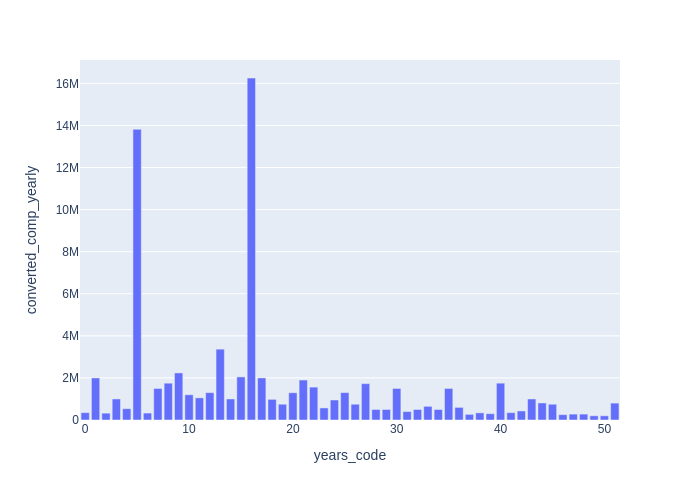

In [16]:
df = df[df["age"] > 1]

max_comp = df.groupby("years_code")["converted_comp_yearly"].max().reset_index()
fig = px.bar(max_comp, x="years_code", y="converted_comp_yearly")
fig.show(renderer="png")

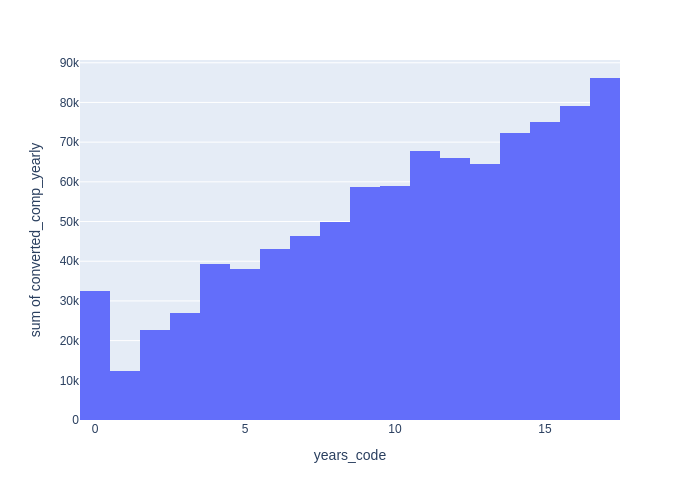

In [17]:
fig = px.histogram(new_grad_median_comp, x="years_code", y="converted_comp_yearly", nbins=20)
fig.show(renderer="png") # TODO

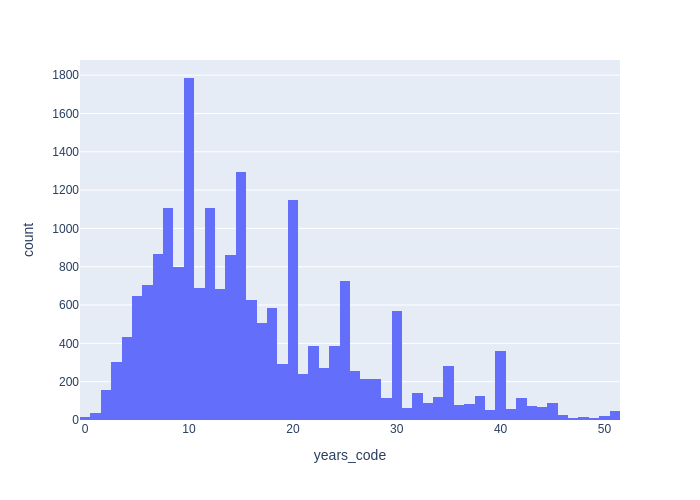

In [18]:
fig = px.histogram(df, x="years_code")
fig.show(renderer="png") # TODO

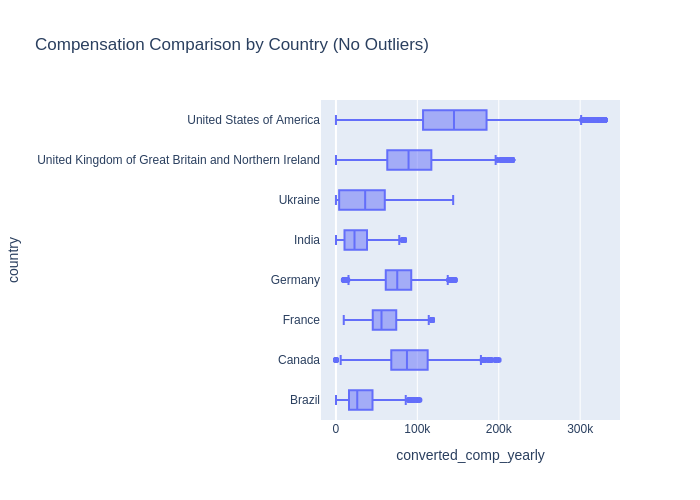

In [19]:
import pandas as pd

# Function to filter out outliers using 1.5 * IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Assuming the dataset is already loaded into df
country_counts = df['country'].value_counts()
countries_with_100_respondents = country_counts[country_counts > 500].index
filtered_df = df[df['country'].isin(countries_with_100_respondents)]

# Remove outliers for the 'converted_comp_yearly' column
filtered_df_no_outliers = filtered_df.groupby('country').apply(remove_outliers_iqr, 'converted_comp_yearly').reset_index(drop=True)

# Generate a box plot without outliers
import plotly.express as px
fig = px.box(filtered_df_no_outliers, x='converted_comp_yearly', y='country', title="Compensation Comparison by Country (No Outliers)")

# Show the plot
fig.show(renderer="png")

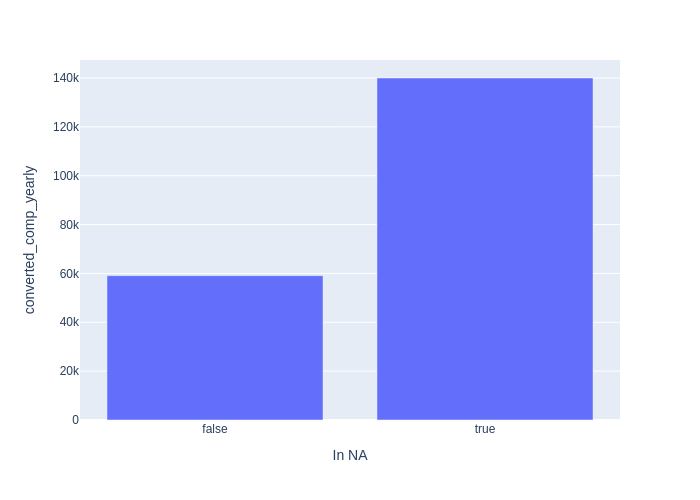

In [20]:
na_vs_world = df.copy()
na_vs_world["In NA"] = (na_vs_world["country"] == "United States of America") | (na_vs_world["country"] == "Canada")

na_vs_world = na_vs_world.groupby("In NA")["converted_comp_yearly"].median().reset_index()

fig = px.bar(na_vs_world, x="In NA", y="converted_comp_yearly")
fig.show(renderer="png") # TODO

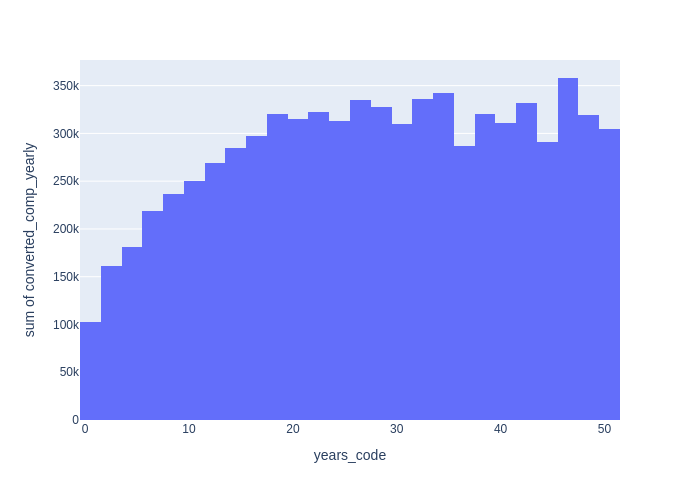

In [21]:
canada_and_usa = df[df["country"].isin(["United States of America", "Canada"])]

canada_and_usa = canada_and_usa.groupby("years_code")["converted_comp_yearly"].median().reset_index()

fig = px.histogram(canada_and_usa, x="years_code", y="converted_comp_yearly", nbins=40)
fig.show(renderer="png") # TODO

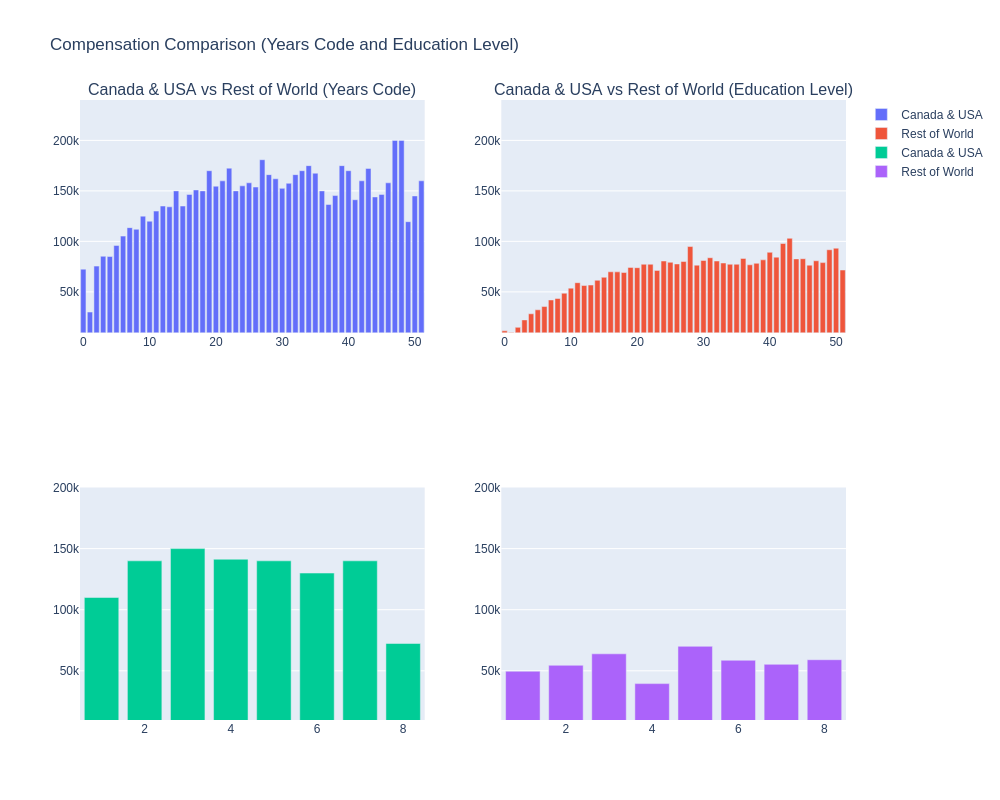

In [22]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Filter for Canada and USA, and the rest of the world
canada_and_usa = df[df["country"].isin(["United States of America", "Canada"])]
rest_of_world = df[~df["country"].isin(["United States of America", "Canada"])]

# Grouping and calculating median compensation for 'years_code'
canada_and_usa_years = canada_and_usa.groupby("years_code")["converted_comp_yearly"].median().reset_index()
rest_of_world_years = rest_of_world.groupby("years_code")["converted_comp_yearly"].median().reset_index()

# Grouping and calculating median compensation for 'ed_level'
canada_and_usa_ed = canada_and_usa.groupby("ed_level")["converted_comp_yearly"].median().reset_index()
rest_of_world_ed = rest_of_world.groupby("ed_level")["converted_comp_yearly"].median().reset_index()

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=("Canada & USA vs Rest of World (Years Code)", 
                                                    "Canada & USA vs Rest of World (Education Level)"))

# Add traces for Years Code (Row 1)
fig.add_trace(go.Bar(x=canada_and_usa_years["years_code"], y=canada_and_usa_years["converted_comp_yearly"], name="Canada & USA"),
              row=1, col=1)
fig.add_trace(go.Bar(x=rest_of_world_years["years_code"], y=rest_of_world_years["converted_comp_yearly"], name="Rest of World"),
              row=1, col=2)

# Add traces for Education Level (Row 2)
fig.add_trace(go.Bar(x=canada_and_usa_ed["ed_level"], y=canada_and_usa_ed["converted_comp_yearly"], name="Canada & USA"),
              row=2, col=1)
fig.add_trace(go.Bar(x=rest_of_world_ed["ed_level"], y=rest_of_world_ed["converted_comp_yearly"], name="Rest of World"),
              row=2, col=2)

# Find the overall y-axis range
all_y_values = pd.concat([canada_and_usa_years["converted_comp_yearly"], 
                          rest_of_world_years["converted_comp_yearly"],
                          canada_and_usa_ed["converted_comp_yearly"],
                          rest_of_world_ed["converted_comp_yearly"]])

y_min, y_max = all_y_values.min(), all_y_values.max()

# Update layout with a uniform y-axis scale
fig.update_yaxes(range=[y_min, y_max * 1.2], row=1, col=1)
fig.update_yaxes(range=[y_min, y_max * 1.2], row=1, col=2)
fig.update_yaxes(range=[y_min, y_max], row=2, col=1)
fig.update_yaxes(range=[y_min, y_max], row=2, col=2)

# Update layout
fig.update_layout(height=800, width=1000, title_text="Compensation Comparison (Years Code and Education Level)")
fig.show(renderer="png")


**ChatGPT Session Summary 1:**
Here's a summary of our interaction:

1. **Initial Request**: You provided a Plotly code that creates three bar graphs comparing average compensation by years of coding experience (`years_code` and `years_code_pro`), and education level (`ed_level`). You wanted to modify the graphs so that each bar is divided into segments showing the percentage of people from each education level, while keeping the bar height as the average compensation.

2. **First Solution**: I suggested a method to stack bars by dividing them into segments based on the percentage of people in each `ed_level`. This would involve calculating both the average compensation and the percentage for each education level within each experience category.

3. **Error Handling**: You encountered a broadcasting error due to a mismatch in array lengths when multiplying percentages with average compensation. I identified that the issue stemmed from misaligned data for experience categories, and updated the solution by reindexing the data to ensure proper alignment.

4. **Additional Request**: You then asked to add a fourth graph that is similar to the first graph (which shows years of coding experience), but instead of education levels, the bar segments should be based on years of education (`years_education`).

5. **Final Solution**: I provided a solution that calculates and displays the stacked bar graph for `years_education` across years of experience, while maintaining the bar height as the average compensation. This resulted in four bar graphs, where the first three focus on years of coding and education level, and the fourth graph uses years of education as the stacked segments.

Let me know if you need further clarifications!

**ChatGPT Session Summary 2:**
In this interaction, you started by troubleshooting a dataset and graphing issues, specifically creating bar charts to compare compensation based on years of experience. You then shifted to using a dataset about compensation from the TidyTuesday project. You filtered the dataset by respondents from countries like the USA and Canada, and I helped you set up side-by-side bar graphs comparing the USA and Canada vs. the rest of the world by both years of experience and education level, ensuring that all graphs shared the same y-axis scale for consistency.

##### 7. Watch the classic Gapminder Video, then have a look at the plotly version and recreate the animation (perhaps after optionally exploring and changing the style, if you wish)

Session link for Q7: https://chatgpt.com/share/66f4dadf-4b08-8012-b065-4c3f34dc2e22

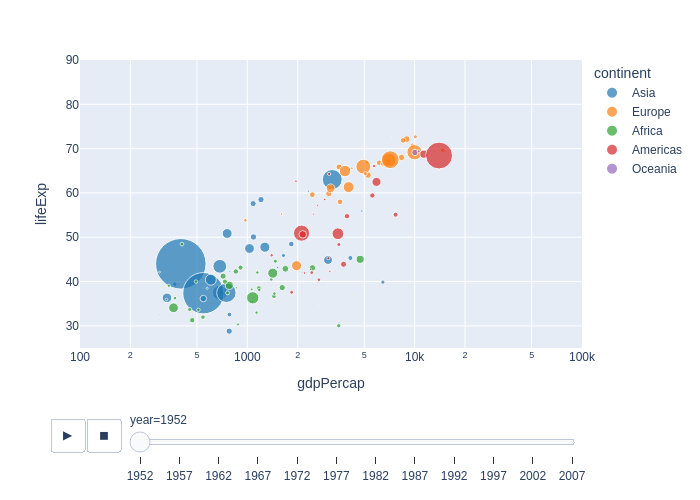

In [23]:
import plotly.express as px

# Load the Gapminder dataset
df = px.data.gapminder()

# Define a custom color sequence
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the scatter plot
fig = px.scatter(
    df,
    x="gdpPercap",
    y="lifeExp",
    animation_frame="year",
    animation_group="country",
    size="pop",
    color="continent",
    hover_name="country",
    log_x=True,
    size_max=55,
    range_x=[100, 100000],
    range_y=[25, 90],
    color_discrete_sequence=color_sequence  # Apply the custom color sequence
)

# Show the plot
fig.show(renderer="png")


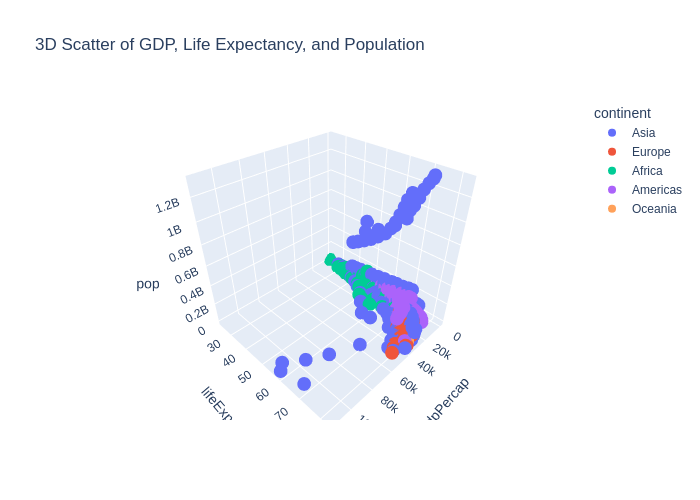

In [24]:
fig = px.scatter_3d(df, x='gdpPercap', y='lifeExp', z='pop', color='continent', 
                     title='3D Scatter of GDP, Life Expectancy, and Population')
fig.show(renderer="png")


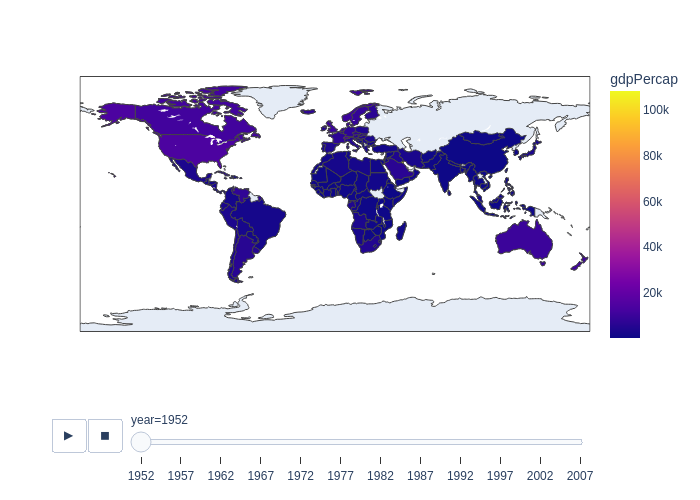

In [25]:
fig = px.choropleth(df, locations='country', locationmode='country names',
                    color='gdpPercap', hover_name='country', animation_frame='year',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show(renderer="png")


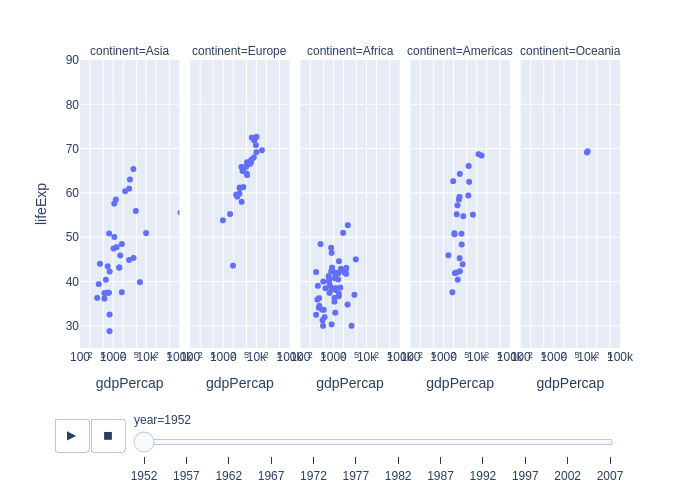

In [26]:
fig = px.scatter(df, x='gdpPercap', y='lifeExp', facet_col='continent', animation_frame='year',
                 log_x=True, size_max=55, range_x=[100, 100000], range_y=[25, 90])
fig.show(renderer="png")


##### ChatGPT Interaction Summary:
Certainly! Here’s a summary of our interaction:

1. **Graph Color Scheme**: You asked for a good color scheme for a Plotly scatter plot using the Gapminder dataset. I provided a custom color palette that differentiates continents effectively and shared example code to implement it.

2. **Exploration Ideas**: I suggested various analyses and visualizations you can perform with the Gapminder dataset, including:
   - Line plots to show trends over time.
   - Bar charts for country comparisons.
   - Facet plots for grouped analysis by continent.
   - Box plots for distribution analysis.
   - Heatmaps for correlation analysis.
   - 3D scatter plots for multi-dimensional visualization.
   - Animated visualizations to showcase changes over time.
   - Interactive dashboards using Dash or Streamlit.
   - Custom metrics for deeper insights.
   - Geographical visualizations with choropleth maps.

Feel free to explore any of these ideas further or ask for specific examples!

##### 8. Provide a second version of the figure from the previous problem where you edit the fig = px.scatter() function from the Gapminder code so that x is "percent change", y is "rank", size is "percent", and color="sex", animation_frame is "year", and animation_group and hover_name are "name". Then use size_max=50, range_x=[-0.005,0.005] and remove the log_x=True and range_y parameters

Session Link for Q8: https://chatgpt.com/share/66f61504-880c-8012-977d-e931a362618c

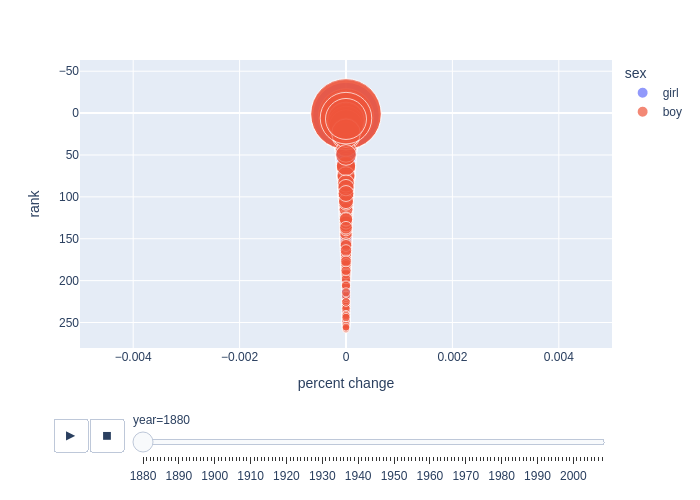

In [27]:
import pandas as pd
import plotly.express as px

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percent change'] = bn.loc[new_name,'percent'] 
bn.loc[bn['year'] == 1880, 'percent change'] = 0
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005])  # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # TODO USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS